Here we demonstrate an example of the gradient ascent/descent design algorithm, for the case of speckle 'mode' sorting. Input basis = speckles, output basis = spatially separated Gaussian spots. This particular version can sort up to 55 orthogonal speckles in mode groups of 1, 3, 6, 10, 15, 21, 28, 36, 45 or 55 speckles. Note that if the number of modes to sort is less than 55 (so if you take a subset of an original orthogonal set), the resulting subset of speckles is no longer orthogonal.

In this particular example we use a 2D version (dealing with 2D complex fields instead of 1D vectorised versions of them) of an objective function shown as eq. 3 in the paper:

$$F_i = \underbrace{\alpha \left|\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\phi}_i\right|^2}_\text{Fidelity - phase free} -\underbrace{\beta\;\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\psi}^{\text{cr}}_i}_\text{Cross-talk} +\underbrace{\gamma\;\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\psi}^{\text{bk}}_i}_\text{Efficiency}$$

where $(\cdot)^{*}$ are the complex conjugates of 2D complex fields, and $i$ indexes the $N$ input-output pairs of modes. The $i^{\text{th}}$ target output mode here is represented by a 2D array $\boldsymbol{\phi}_i$ and the $i^{\text{th}}$ MPLC output - by a 2D array $\boldsymbol{\psi}_i$. We aim to maximise the value of the real positive scalar $F_{\text{T}} = \sum_{i=1}^{N}F_i$.

For a mode sorter design, ${\boldsymbol{\psi}^{\text{cr}}_i = \boldsymbol{\psi}_i\odot\boldsymbol{\phi}_i^{\text{cr}}}$, where the operation $\odot$ signifies the element-wise product, and $\boldsymbol{\phi}_i^{\text{cr}}$ defines the locations of the wrong output channels, i.e. its elements are set to 1 inside all output channels other than the target channel and to zero everywhere else - Fig.1(d) from the paper shows an example.
${\boldsymbol{\psi}^{\text{bk}}_i = \boldsymbol{\psi}_i\odot\boldsymbol{\phi}^{\text{bk}}}$, where $\boldsymbol{\phi}^{\text{bk}}$ defines the background area surrounding all channels - Fig.1(e).

Inner products, $\boldsymbol{\psi}_{i}^{*}\cdot\boldsymbol{\psi}_{i}^{\text{cr}}$ and $\boldsymbol{\psi}_{i}^{*}\cdot\boldsymbol{\psi}_{i}^{\text{bk}}$ are both real and positive - ensuring that $F_i$ and thus also $F_{\text{T}}$ are real and positive as required. Because of that fact the objective function can be rewritten as follows:

$F_i = \alpha \left|\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\phi}_i\right|^2 -\beta\;\text{Re}\{\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\psi}^{\text{cr}}_i\} + \gamma\; \text{Re}\{\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\psi}^{\text{bk}}_i\}$

However instead of maximising the objective function like it is shown in the paper, here we aim to minimise it, which means dealing with the objective function with inverted signs:

$F_i = - \alpha \left|\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\phi}_i\right|^2 + \beta\;\text{Re}\{\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\psi}^{\text{cr}}_i\} - \gamma\; \text{Re}\{\boldsymbol{\psi}^{*}_i\cdot\boldsymbol{\psi}^{\text{bk}}_i\}$

Then the gradient of $F_{i}$ is given by:

$\frac{\partial F_{i}}{\partial\boldsymbol{\psi}^{*}_{i}}= - \alpha\;\left(\boldsymbol{\psi}_{i}\cdot\boldsymbol{\phi}^{*}_{i}\right)\boldsymbol{\phi}_{i}+ \tfrac{1}{2}\beta\;\boldsymbol{\psi}_{i}^{{\rm cr}\;} - \tfrac{1}{2}\gamma\;\boldsymbol{\psi}_{i}^{{\rm bk}\;}$

Note that here we calculate $\frac{\partial F_{i}}{\partial\boldsymbol{\psi}^{*}_{i}}$ rather than $\frac{\partial F_{i}}{\partial\boldsymbol{\psi}_{i}}$ like it is shown in the paper due to a different convention on from which side do we look at the system.


Then we calculate the sign applied to each pixel $p$ of a phase mask $n$: 

${\rm sign}[\theta_{n,p}]={\rm sign}\left\{{\rm Im}\left[{\rm e}^{{\rm i}\theta_{n,p}}\sum_{i}\left(\frac{\partial F_{i}}{\partial\boldsymbol{\psi}^{*}_{i}}\right)^\text{bp}_{p}\left(\chi_{i}\right)^\text{fp}_{p}\right]\right\} $               (1)

where $\left(\frac{\partial F_{i}}{\partial\boldsymbol{\psi}^{*}_{i}}\right)^\text{bp}$ is $\frac{\partial F_{i}}{\partial\boldsymbol{\psi}^{*}_{i}}$ propagated backwards up to the plane of interest $n$, and $\left(\chi_{i}\right)^\text{fp}$ is the input mode $i$ propagated forward to the same plane $n$.


Then the change to each pixel of the phase mask $n$ on the current iteration can be calculated using a user-defined step size $\delta\theta$:

$\delta P_{n,p}=\delta\theta \cdot {\rm sign}[\theta_{n,p}]$

After updating a certain phase mask on a current iteration, $\frac{\partial F_{i}}{\partial\boldsymbol{\psi}^{*}_{i}}$ gets re-calculated in order to update the next phase mask and the process repeats. All the phase masks must be updated before proceeding to the next iteration.

Step size $\delta\theta$ can vary depending on a bit depth of the available phase-modulating device. Gray-scale SLM screens operate on 8-bit data, so the step size that guarantees the best precision in that case is $\delta\theta = \frac{2\pi}{255}$

In [1]:
import torch
import numpy as np
import torch.nn as nn
import math
import scipy
from scipy.io import loadmat
from typing import Union
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# custom functions imported from the utils.py file available within the package
from utils import *

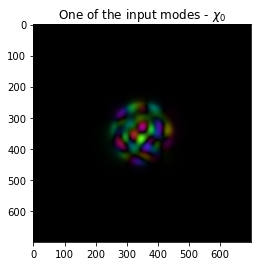

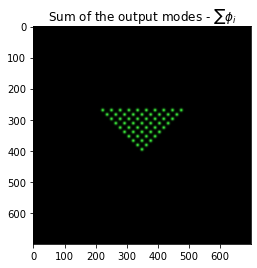

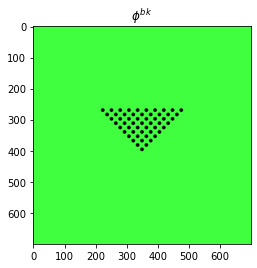

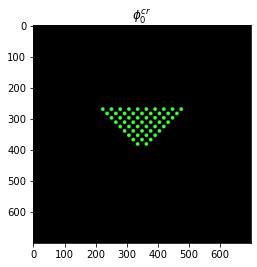

iteration 10 : loc. fidelity = 79.04 , crosstalk = 64.55 , efficiency = 0.43
iteration 20 : loc. fidelity = 90.82 , crosstalk = 39.42 , efficiency = 0.5
iteration 30 : loc. fidelity = 93.56 , crosstalk = 19.15 , efficiency = 0.8
iteration 40 : loc. fidelity = 94.28 , crosstalk = 13.7 , efficiency = 1.29
iteration 50 : loc. fidelity = 94.62 , crosstalk = 11.09 , efficiency = 1.84
iteration 60 : loc. fidelity = 94.8 , crosstalk = 9.45 , efficiency = 2.4
iteration 70 : loc. fidelity = 94.89 , crosstalk = 8.37 , efficiency = 2.93
iteration 80 : loc. fidelity = 94.93 , crosstalk = 7.52 , efficiency = 3.4
iteration 90 : loc. fidelity = 94.93 , crosstalk = 6.93 , efficiency = 3.83
iteration 100 : loc. fidelity = 94.94 , crosstalk = 6.45 , efficiency = 4.19
iteration 110 : loc. fidelity = 94.92 , crosstalk = 6.11 , efficiency = 4.51
iteration 120 : loc. fidelity = 94.92 , crosstalk = 5.78 , efficiency = 4.77
iteration 130 : loc. fidelity = 94.91 , crosstalk = 5.56 , efficiency = 5.01
iteration

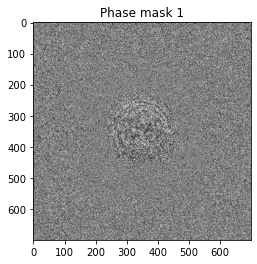

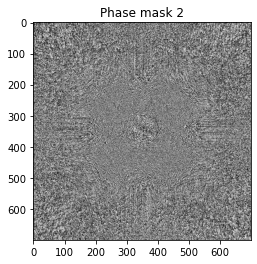

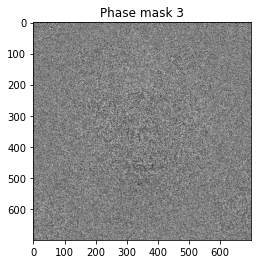

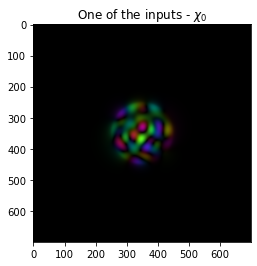

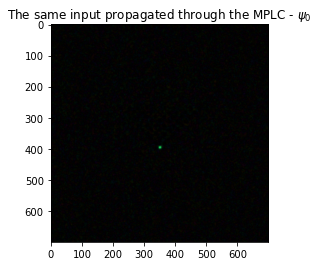

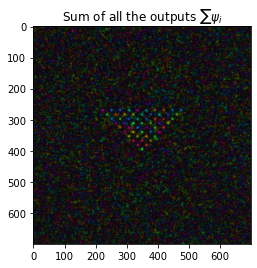

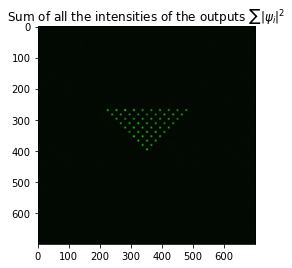

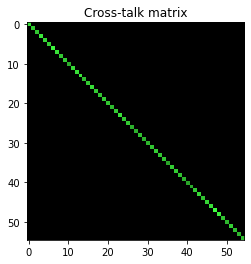

In [18]:
n_of_modes = 55 # number of modes to sort
Planes = 3 # number of phase masks to design
iterations = 300 # number of iterations to run for (number of times each phase mask gets updated during the design process)

# Alpha, beta and gamma factors to adjust the objective function
alpha = 1.0
beta = 2.0
gamma = 0.0

first_n_iterations = 10 # use a bigger step size for the first 10 iterations
delta_theta_1 = 2*math.pi/255 # usual step size
delta_theta_0 = delta_theta_1*10 # bigger step size

Nx = 700 # resolution of a field of view in pixels (x)
Ny = 700 # resolution of a field of view in pixels (y)
pixelSize = 12.5e-6 # pixel pitch, in m (chosen to match a pixel pitch of the Hamamatsu X13138-01 SLM)
wavelength = 633.e-9 # wavelength, in m

reprW = Nx*pixelSize # physical width of a field of view, in m
reprH = Ny*pixelSize # physical height of a field of view, in m 

d_in = 0e-3 # free-space propagation distance from the plane where all the inputs are generated to the first phase mask of the MPLC, in m (used to simulate inputs being slightly defocused)
d = 50e-3 # free-space propagation distance between each pair of phase masks, in m

calc_perf_every_it = 10 # calculate and print out sorter's performance every 10 iterations
crs_delta = 0.0001*calc_perf_every_it # stop the algorithm before the target number of iterations has been reached if the cross-talk hasn't improved by this amount since the last time it has been calculated

equalize_efficiency = 1 # 1 - on, 0 - off. sometimes the algorithm gets pulled towards sorting some of the modes from a set more efficiently than the other ones. use equalize_efficiency = 1 to compensate this.
plot_eff_distribution = 0 # plot the efficiency distribution every time sorter's performance gets calculated during the design process

smoothing_switch = 0 # 1 - on, 0 - off. mask the regions of the phase masks where there is almost no incedent light. 
# as usually these regions are next to the edge of the field of view, this also allows to prevent light being scattered to the outside of the field of view and coming back from the other side
OffsetMultiplier = 0e-5 # tweak this to adjust the strength of 'masking' the phase masks
maskOffset = OffsetMultiplier*np.sqrt(1e-3/(Nx*Ny*n_of_modes))

# import previously generated input and output bases (speckle basis as an input, Gaussian basis as an output in this case), as well as a set of binary masks defining different channels in the output plane
Speckle_basis = loadmat("./Speckle_sorter_bases.mat")["Fibre_speckle_basis"]
Gaussian_basis = loadmat("./Speckle_sorter_bases.mat")["Gaussian_basis"]
Gaussian_Masks = loadmat("./Speckle_sorter_bases.mat")["Gaussian_Masks"]

# take subsets of the basis arrays in case the number of modes sorted is less than 55. note that the input speckle basis is only orthogonal if n_of_modes = 55
Speckle_basis = Speckle_basis[0:n_of_modes,:,:]
Gaussian_basis = Gaussian_basis[0:n_of_modes,:,:]
Gaussian_Masks = Gaussian_Masks[0:n_of_modes,:,:]

# convert arrays from numpy ndarrays to torch tensors
Speckle_basis_torch = torch.from_numpy(Speckle_basis)
Gaussian_basis_torch = torch.from_numpy(Gaussian_basis)
Gaussian_Masks_torch = torch.from_numpy(Gaussian_Masks)

# if the chosen resolution of the field of view Nx, Ny larger than the resolution input/output bases were generated in, pad bases with zeros to match the resolution.
if Nx or Ny >  400:
    Speckle_basis_torch = nn.functional.pad(Speckle_basis_torch, (int((Nx-400)/2),Nx-400-int((Nx-400)/2),int((Ny-400)/2),Ny-400-int((Ny-400)/2)), mode='constant', value = 0.+0.j)
    Gaussian_basis_torch = nn.functional.pad(Gaussian_basis_torch, (int((Nx-400)/2),Nx-400-int((Nx-400)/2),int((Ny-400)/2),Ny-400-int((Ny-400)/2)), mode='constant', value = 0.+0.j)
    Gaussian_Masks_torch = nn.functional.pad(Gaussian_Masks_torch, (int((Nx-400)/2),Nx-400-int((Nx-400)/2),int((Ny-400)/2),Ny-400-int((Ny-400)/2)), mode='constant', value = 0.+0.j)

# calculate phi_bk - the binary mask outlining the backgroud region where there are no target output channels
phi_bk = 1 - torch.sum(Gaussian_Masks_torch, axis = 0)

# calculate phi_cr - the binary mask outlining all the wrong output channels for each mode in
phi_cr = torch.zeros((n_of_modes, Ny, Nx), dtype = torch.double)
for i in range(n_of_modes):
    phi_cr[i,:,:] = torch.sum(Gaussian_Masks_torch, axis = 0) - Gaussian_Masks_torch[i,:,:]

phi = Gaussian_basis_torch

# visualize one of the input modes, a set of Gaussians on the outputs and a binary mask outlining the backgroud region
# brightness = amplitude, colour = phase
plt.title("One of the input modes - $\chi_{0}$")
complim(Speckle_basis_torch[0, :, :])

plt.title("Sum of the output modes - $\sum\phi_{i}$")
complim(torch.sum(phi, axis = 0))

plt.title("$\phi^{bk}$")
complim(phi_bk)

plt.title("$\phi_{0}^{cr}$")
complim(phi_cr[0,:,:])


# calculate wavenumber and its x, y, z components, create XY coordinate grids
k = (2 * np.pi) / wavelength

nx = pixelSize*np.linspace(-(Nx-1)/2, (Nx-1)/2, num=Nx)
ny= pixelSize*np.linspace(-(Ny-1)/2, (Ny-1)/2, num=Ny)
X,Y = np.meshgrid(nx,ny)
X_torch = torch.from_numpy(X)
Y_torch = torch.from_numpy(Y)

nx = np.linspace(-(Nx-1)/2, (Nx-1)/2, num=Nx)
ny = np.linspace(-(Ny-1)/2, (Ny-1)/2, num=Ny)
kx, ky = np.meshgrid(2*np.pi*nx/(Nx*pixelSize),2*np.pi*ny/(Ny*pixelSize))
kz = np.sqrt(k**2 - (kx**2 + ky**2))
kz = kz.astype(np.cdouble)
kz_torch = torch.from_numpy(kz)

Masks = torch.zeros((Planes,Ny,Nx)) # use zero phases as starting guesses for the phase masks
Masks_complex = torch.exp(1j*Masks) # complex representation of the phase masks with amplitude = 1 everywhere

# create placeholder arrays to store every input and every output field in each plane
Modes_in = torch.zeros((Planes, n_of_modes, Ny, Nx), dtype = torch.cdouble)
Modes_out = torch.zeros((Planes, n_of_modes, Ny, Nx), dtype = torch.cdouble)

overlap = torch.zeros((n_of_modes), dtype = torch.cdouble)
eff_distribution = torch.ones((n_of_modes), dtype = torch.double)
dFdpsi = torch.zeros((Planes, n_of_modes, Ny, Nx), dtype = torch.cdouble)
crs_array_convergence = torch.zeros((iterations//calc_perf_every_it), dtype = torch.double)
conv_count = 0

# store input modes directly in front of the 1st phase plane of the MPLC
Modes_in[0, :, :, :] = propagate_HK(Speckle_basis_torch, kz_torch, d_in) 
# store output modes straight after the last phase plane of the MPLC. We simulate a system where the last plane of the MPLC and the output plane are separated by a Fourier transform lens 
Modes_out[Planes-1, :, :, :] = ifft2(phi) 

# iterate 
for i in range(1, iterations+1):

    # change the step size depending on the current iteration number
    if i < first_n_iterations:
        delta_theta = delta_theta_0
    else:
        delta_theta = delta_theta_1

    # update all the phase masks on this iteration in an ascending order
    for mask_ind in range(Planes):

        # propagate input modes forward up to the last plane
        modes = torch.zeros((n_of_modes, Ny, Nx), dtype = torch.cdouble)
        for pl in range(Planes-1):
            modes = Modes_in[pl, :, :, :]*Masks_complex[pl, :, :] # add a phase masks to all the incoming modes at once
            modes = propagate_HK(modes, kz_torch, d) # propagate all the modes at once distance d through free space
            Modes_in[pl+1, :, :, :] = modes
        modes_forw_last_plane = Modes_in[Planes-1, :, :, :]*Masks_complex[Planes-1, :, :] # add the last phase mask
        psi = fft2(modes_forw_last_plane) # go from the last plane of the MPLC to the output plane in a Fourier plane of it

        # calculate differentials of the objective functions dFdpsi for every input-output pair of modes 
        for j in range(n_of_modes):
            overlap = torch.sum(torch.squeeze(psi[j,:,:])*torch.conj(torch.squeeze(phi[j,:,:])))
            a = (phi[j, :, :])*overlap
            psi_cr = (torch.squeeze(psi[j,:,:]))*torch.squeeze(phi_cr[j,:,:])
            psi_bk = (torch.squeeze(psi[j,:,:]))*phi_bk
            dFdpsi[Planes-1,j,:,:] = - alpha*a + (beta*psi_cr - gamma*psi_bk)*0.5 # store dF/dpsi in the output plane before propagating it back to the phase plane of interest

        dFdpsi[Planes-1,:,:,:] = ifft2(dFdpsi[Planes-1,:,:,:]) # get from the output plane to the last plane of the MPLC
        
        # propagate dF/dpsi back through the MPLC up to the phase plane of interest and store it in every intermediate plane
        for pl in range(Planes-1, mask_ind, -1):
            dFdpsi_prop = dFdpsi[pl,:,:,:]*torch.conj(Masks_complex[pl, :, :]) # subtract phase mask from the fields propagated backwards
            dFdpsi_prop = propagate_HK(dFdpsi_prop, kz_torch, -d) # propagate fields distance -d backwards
            dFdpsi[pl-1, :, :, :] = dFdpsi_prop
            
            # do the same not only to the dF/dpsi arrays, but also to the actual output modes phi as this will be needed to apply smoothing
            phi_prop = Modes_out[pl, :, :, :]*torch.conj(Masks_complex[pl, :, :]) 
            phi_prop = propagate_HK(phi_prop, kz_torch, -d)
            Modes_out[pl-1, :, :, :] = phi_prop

        # if equalize_efficiency is on, make a sum in (1) a weighted sum, where the weights are 1/(relative_efficiency_i) for each particular mode            
        if equalize_efficiency == 1:
            weighted_overlaps = torch.zeros((Nx,Ny), dtype = torch.cdouble)
            for mode in range(n_of_modes):
                weighted_overlaps = weighted_overlaps + (1/eff_distribution[mode])*torch.squeeze(Modes_in[mask_ind, mode, :, :])*torch.conj(torch.squeeze(dFdpsi[mask_ind, mode, :, :]))
            delta_P = delta_theta*torch.sign(torch.imag(Masks_complex[mask_ind]*weighted_overlaps))
        else:
            delta_P = delta_theta*torch.sign(torch.imag(Masks_complex[mask_ind]*torch.sum(torch.squeeze(Modes_in[mask_ind, :, :, :])*torch.conj(torch.squeeze(dFdpsi[mask_ind, :, :, :])), axis = 0)))
        
        #  if smoothing_switch is on, mask the regions of the phase masks where there is almost no incedent light, based on the overlap of input and output modes at this plane
        if smoothing_switch == 1:
                ovrlp_in_out = torch.abs(torch.sum(torch.squeeze(Modes_in[mask_ind, :, :, :]*torch.conj(Modes_out[mask_ind, :, :, :])), axis = 0))
                # add phase delta_P to a current guess of the certain phase mask. 
                # for a complex representation, set an overlap of inputs/outputs as an amplitude for a resulting phase
                mask_cmplx = ovrlp_in_out*torch.exp(1j*(Masks[mask_ind, :, :] + delta_P)) 
                mask_cmplx = mask_cmplx + maskOffset # add a real-valued offset to mask the regions with almost no incident light
                Masks[mask_ind, :, :] = torch.angle(mask_cmplx) # take a phase of a result and store it as a current guess of a certain phase mask
        #  if smoothing_switch is off, just add phase delta_P to a current guess of the certain phase mask
        else:
            Masks[mask_ind, :, :] = Masks[mask_ind, :, :] + delta_P

        # store the resulting current guess of the phase mask as a complex array, with amplitude = 1 everywhere
        Masks_complex[mask_ind, :, :] = torch.exp(1j*torch.squeeze(Masks[mask_ind, :, :]))


    # calculate and print out sorter's performance after every iteration (or every K iterations to save time)
    if i % calc_perf_every_it == 0:
        # propagate all the input modes through the MPLC system after all of the phase masks were updated 
        # on the current iteration to calculate sorter's performance
        for pl in range(Planes-1):
            modes = Modes_in[pl, :, :, :]*Masks_complex[pl, :, :]
            modes = propagate_HK(modes, kz_torch, d)
            Modes_in[pl+1, :, :, :] = modes

        modes = modes*Masks_complex[Planes-1,:,:] # add the last phase mask
        psi = fft2(modes) # go from the last plane of the MPLC to the output plane
        psi_int_only = (torch.abs(psi))**2 # intensities in the output plane

        # calculate and print out sorter's performance
        # return an average localized fidelity and a full list of localized fidelities
        fid, fid_list = performance_loc_fidelity(psi, Gaussian_Masks_torch, phi) 
        # return an average cross-talk, a list of average cross-talks for each mode and a cross-talk matrix
        crs, crs_list, crs_matrix = performance_crosstalk(psi_int_only, Gaussian_Masks_torch) 
        # return an average efficiency and a full list of efficiencies
        eff, eff_list = performance_efficiency(psi_int_only, Gaussian_Masks_torch)
        
        print('iteration', i, ': loc. fidelity =', round(fid.detach().numpy().item(),2), ', crosstalk =', round(crs.detach().numpy().item(),2), ', efficiency =', round(eff.detach().numpy().item(),2))
        crs_array_convergence[conv_count] = crs # store calculated cross-talk to an array to then plot it against the number of iterations
        
        # stop iterating if the algorithm is no longer improving cross-talk by more than a certain value after a certain iteration
        if i > (iterations/3) and (crs_array_convergence[conv_count-1] - crs_array_convergence[conv_count]) < crs_delta:
            break
        conv_count = conv_count + 1

        # store a list of a relative efficiency of every output on the current iteration to try to equalize them on the next run
        if equalize_efficiency == 1:
            eff_distribution = eff_list/torch.max(eff_list)
            # plot efficiency distribution if plot_eff_distribution is on
            if plot_eff_distribution == 1:                    
                plt.plot(eff_distribution)
                plt.title('efficiency distribution')
                plt.ylim((0,1))
                plt.show()
        
# calculate and print out sorter's performance after the last iteration
fid, fid_list = performance_loc_fidelity(psi, Gaussian_Masks_torch, phi)
crs, crs_list, crs_matrix = performance_crosstalk(psi_int_only, Gaussian_Masks_torch)
eff, eff_list = performance_efficiency(psi_int_only, Gaussian_Masks_torch)

print('Final performance: loc. fidelity =', round(fid.detach().numpy().item(),3), ', crosstalk =', round(crs.detach().numpy().item(),3), ', efficiency =', round(eff.detach().numpy().item(),3))

# visualize designed phase masks in grayscale and some of the fields
for i in range(Planes):
    plt.title("Phase mask %s" %(i+1))
    _ = plot_in_GS(Masks[i,:,:])


plt.title("One of the inputs - $\chi_{0}$")
complim(Modes_in[0, 0, :, :])

plt.title("The same input propagated through the MPLC - $\psi_{0}$")
complim(psi[0, :, :])

plt.title("Sum of all the outputs $\sum \psi_{i}$")
complim(torch.sum(psi, axis = 0))

plt.title("Sum of all the intensities of the outputs $\sum | \psi_{i} |^{2}$")
complim(torch.sum(psi_int_only, axis = 0))

# plot a cross-talk matrix
plt.title("Cross-talk matrix")
complim(crs_matrix)

In [19]:
# add some padding around every array and simulate forward propagation through the MPLC up to the output plane
# to make sure no light goes over the edge and comes back from the other side of the field of view

newNx = Nx + 400
newNy = Ny + 400

Modes_in_wide = torch.zeros((Planes,n_of_modes,newNx,newNy), dtype=torch.cdouble)
Modes_in_wide[0,:,200:200+Nx,200:200+Ny] = Modes_in[0,:,:,:]

Masks_wide = torch.zeros((Planes,newNy,newNx), dtype = torch.double)
Masks_complex_wide = torch.exp(1j*Masks_wide)
Masks_complex_wide[:,200:200+Nx,200:200+Ny] = Masks_complex

# re-calculate k_z for a new size of the field of view
nx_wide = np.linspace(-(newNx-1)/2, (newNx-1)/2, num=newNx)
ny_wide = np.linspace(-(newNy-1)/2, (newNy-1)/2, num=newNy)

kx_wide, ky_wide = np.meshgrid(2*np.pi*nx_wide/(newNx*pixelSize),2*np.pi*ny_wide/(newNy*pixelSize))
kz_wide = np.sqrt((2*np.pi/wavelength)**2 - (kx_wide**2 + ky_wide**2))
kz_wide = kz_wide.astype(np.cdouble)
kz_torch_wide = torch.from_numpy(kz_wide)

# propagate all the inputs through the MPLC system to calculate sorter's performance
for pl in range(Planes-1):
    modes = Modes_in_wide[pl, :, :, :]*Masks_complex_wide[pl, :, :] # add phase masks
    modes = propagate_HK(modes, kz_torch_wide, d) # propagate distance d forward through free space
    Modes_in_wide[pl+1, :, :, :] = modes

modes = modes*Masks_complex_wide[Planes-1,:,:] # add the last phase mask
modes_cropped = modes[:,200:200+Nx,200:200+Ny] # crop arrays back to the original size to avoid fields being rescaled by the fft2
psi_cropped = fft2(modes_cropped) # go from the last plane of the MPLC to the output plane
psi_cropped_int_only = (torch.abs(psi_cropped))**2 # intensities in the output plane


# calculate and print out sorter's performance with the wider field of view
fid_wide, fid_list_wide = performance_loc_fidelity(psi_cropped, Gaussian_Masks_torch, phi)
crs_wide, crs_list_wide, crs_matrix_wide = performance_crosstalk(psi_cropped_int_only, Gaussian_Masks_torch)
eff_wide, eff_list_wide = performance_efficiency(psi_cropped_int_only, Gaussian_Masks_torch)

print('performance padded: loc. fidelity =', round(fid_wide.detach().numpy().item(),3), ', crosstalk =', round(crs_wide.detach().numpy().item(),3), ', efficiency =', round(eff_wide.detach().numpy().item(),3))

performance padded: loc. fidelity = 94.575 , crosstalk = 5.583 , efficiency = 6.465


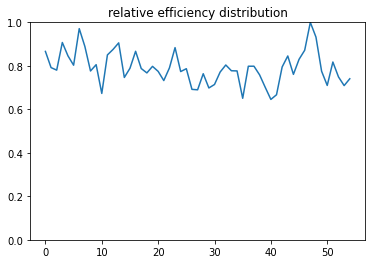

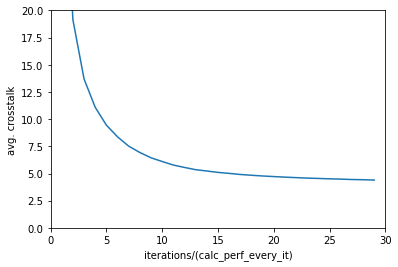

In [20]:
# check relative efficiency distribution
eff_distribution = eff_list_wide/torch.max(eff_list_wide)
plt.plot(eff_distribution)
plt.title('relative efficiency distribution')
plt.ylim((0,1))
plt.show()

# check how well has the algorithm converged towards the local minimum
plt.plot(crs_array_convergence)
plt.ylabel('avg. crosstalk')
plt.xlabel('iterations/(calc_perf_every_it)')
plt.axis([0, iterations//calc_perf_every_it, 0, 20])
plt.show()